# Problema 7 (Extra)
Implemente una funcion que sugiera si una imagen en escala de grises requiere o no la ecualizacion de su histograma, para esto puede utilizar un valor entre 0 a 1, donde 0 significara que la imagen no requiere ecualizacion y 1 significara que la imagen requiere ecualizacion fuertemente, si el valor es mayor a 0.5 su funcion debe realizar la ecualizacion de histograma vista en clase.

## Librerias

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import os

## Función Comprobar

In [41]:
def comprobar_ecualizar(img: np.ndarray) -> tuple[np.ndarray, int, float]:
    """Evalúa si una imagen en escala de grises requiere ecualización. Si el valor calculado es > 0.5 aplica ecualización de histograma.

    Args:
        img_gray (np.ndarray): Imagen en escala de grises.

    Returns:
        img_hist (np.ndarray): Histograma de imagen original
        parametro (int): Condición si se debe ecualizar o no la imágen (1:Si / 0:No)
    """
    # Calcular el histograma de la imagen
    img_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    
    # Normalizar histograma a probabilidades (densidad)
    total_pixeles = img.shape[0] * img.shape[1]
    densidad = np.true_divide(img_hist, total_pixeles)

    # Índices de niveles de gris: 0 a 255
    niveles = np.arange(256).reshape(-1, 1)

    # Media del histograma
    media = np.sum(niveles * densidad)

    # Varianza del histograma
    varianza = np.sum(((niveles - media) ** 2) * densidad)

    # Desviación estándar
    sigma = 255 / np.sqrt(12)  # ≈ 73.6122

    # Skewness (asimetría)
    asimetria = np.sum(((niveles - media)**3) * densidad) / (np.sqrt(varianza) ** 3)
    
    # normalizar la combinación de dispersin y asimetria
    parametro = (1 - (np.sqrt(varianza) / sigma)) + abs(asimetria)
    parametro = parametro / 2

    return img_hist, parametro, densidad

## Función Ecualizar

In [32]:
def img_ecualizar(img: np.ndarray, densidad: float)-> tuple[np.ndarray, np.ndarray]:
    """Ecualiza la imagen recibida y devuelve la imagen ecualizada y el histograma

    Args:
        img (np.ndarray): Imagen en escala de grises a ecualizar
        densidad (float): distribucion de prob del histograma

    Returns:
        img_ecualizada (np.ndarray): Imagen ecualizada
        hist_ecualizada (np.ndarray): Histograma ecualizado
    """

    # Calcular CDF
    cdf = np.cumsum(densidad)
    img_ecualizada = np.zeros_like(img)

    # Aplicar transformación de cada pixel usando CDF
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j]
            newPixel = round(255 * cdf[pixel])
            img_ecualizada[i, j] = newPixel
    
    # histograma de imagen ecualizada
    hist_ecualizada = cv2.calcHist([img_ecualizada], [0], None, [256], [0, 256])

    return img_ecualizada, hist_ecualizada

## Programa

Bienvenido 
Indique que imagen quiere ecualizar.
No se admiten letras ni carácteres especiales como espacios ni símbolos 


MENU PRINCIPAL

Ingrese el valor numérico de acuerdo a la siguinte lista:
1 = Iceland
2 = Owl
3 = PRS
4 = Dream Theater
5 = Desierto
0 = Salir del programa

Seleccionó la imagen No.1


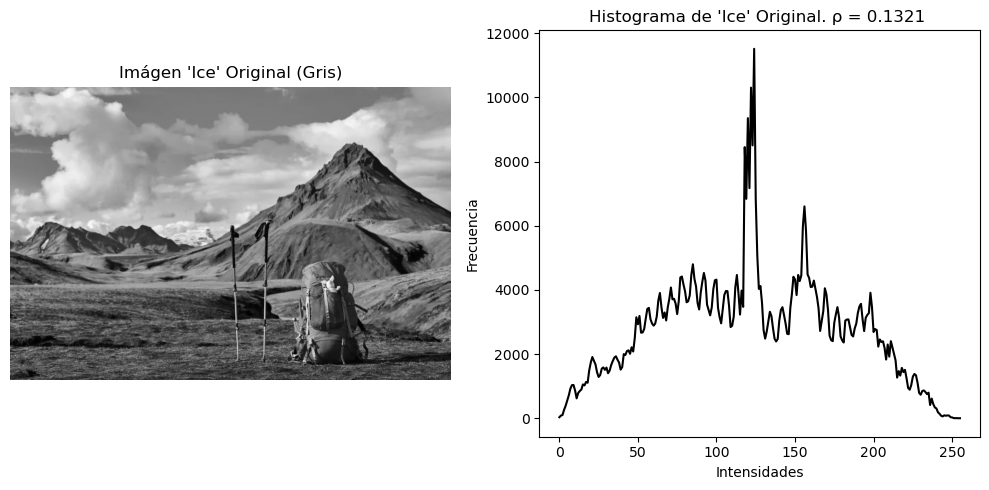


MENU PRINCIPAL

Ingrese el valor numérico de acuerdo a la siguinte lista:
1 = Iceland
2 = Owl
3 = PRS
4 = Dream Theater
5 = Desierto
0 = Salir del programa

Seleccionó la imagen No.2


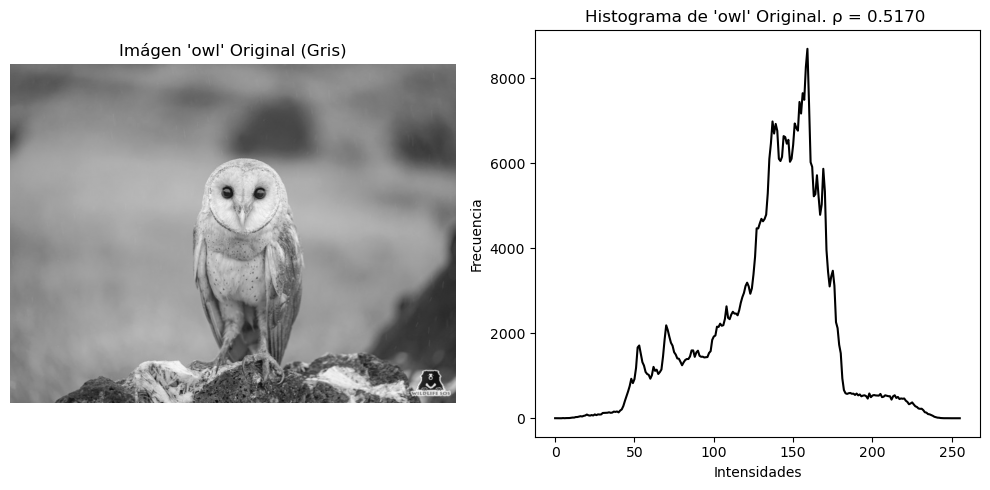

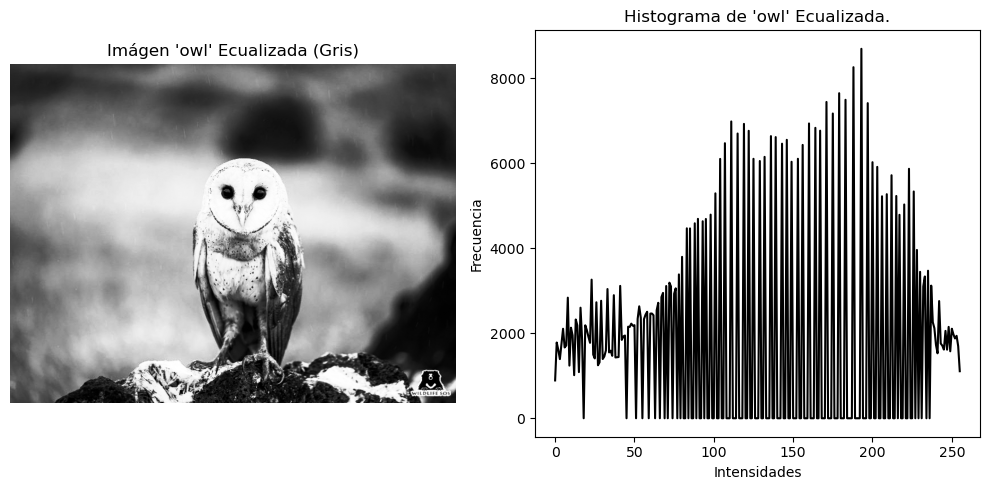


MENU PRINCIPAL

Ingrese el valor numérico de acuerdo a la siguinte lista:
1 = Iceland
2 = Owl
3 = PRS
4 = Dream Theater
5 = Desierto
0 = Salir del programa

Seleccionó la imagen No.3


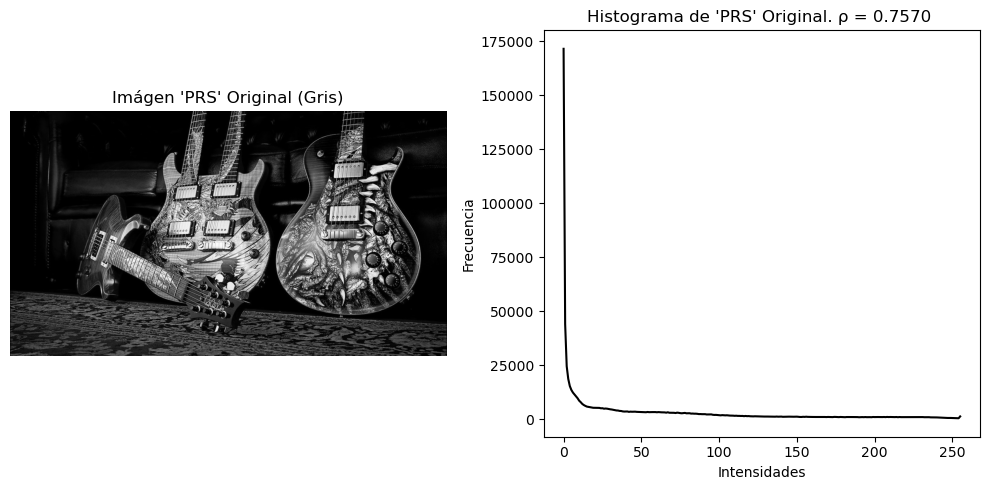

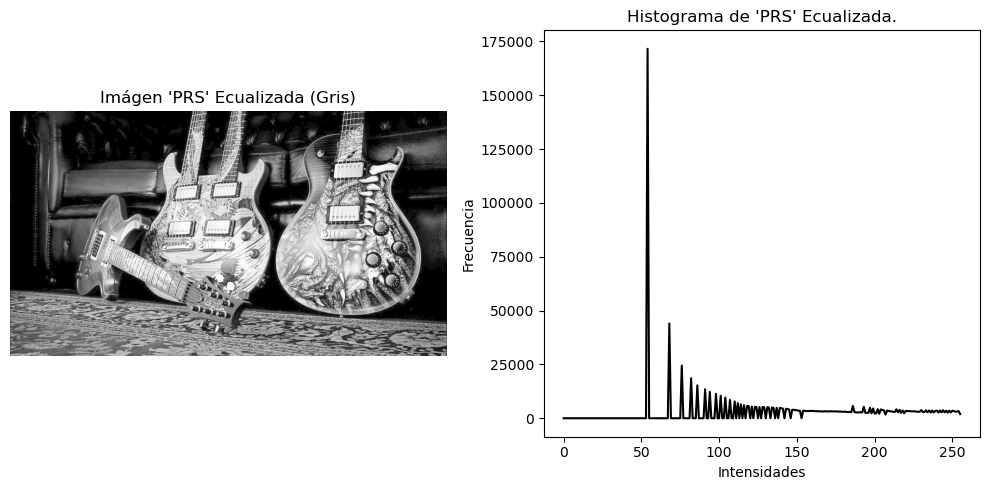


MENU PRINCIPAL

Ingrese el valor numérico de acuerdo a la siguinte lista:
1 = Iceland
2 = Owl
3 = PRS
4 = Dream Theater
5 = Desierto
0 = Salir del programa

Seleccionó la imagen No.4


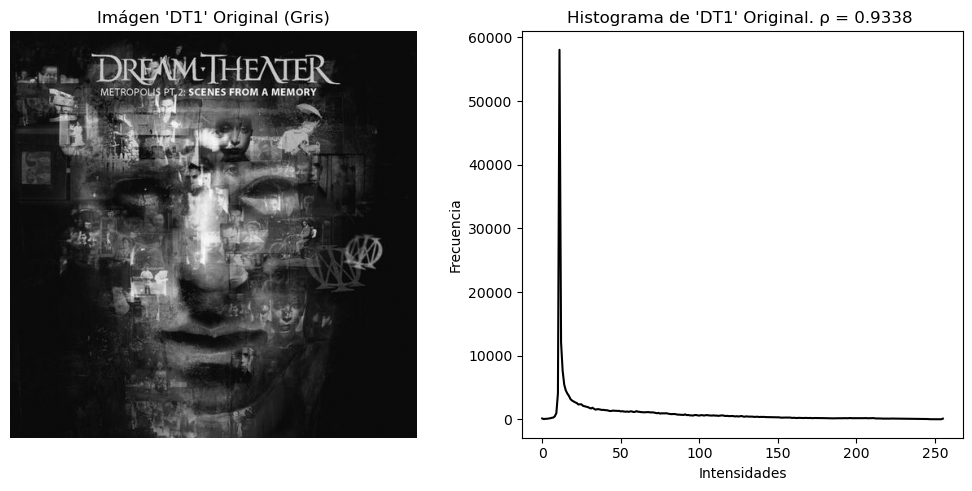

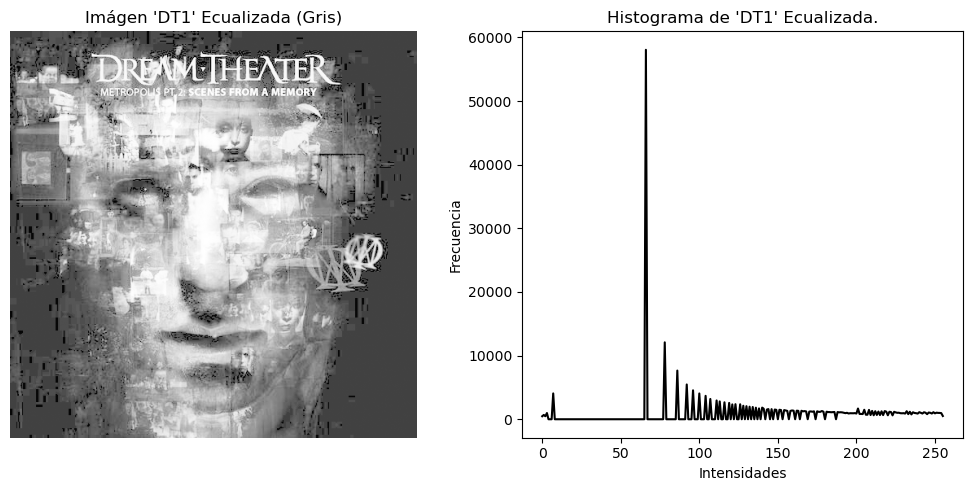


MENU PRINCIPAL

Ingrese el valor numérico de acuerdo a la siguinte lista:
1 = Iceland
2 = Owl
3 = PRS
4 = Dream Theater
5 = Desierto
0 = Salir del programa

Seleccionó la imagen No.5


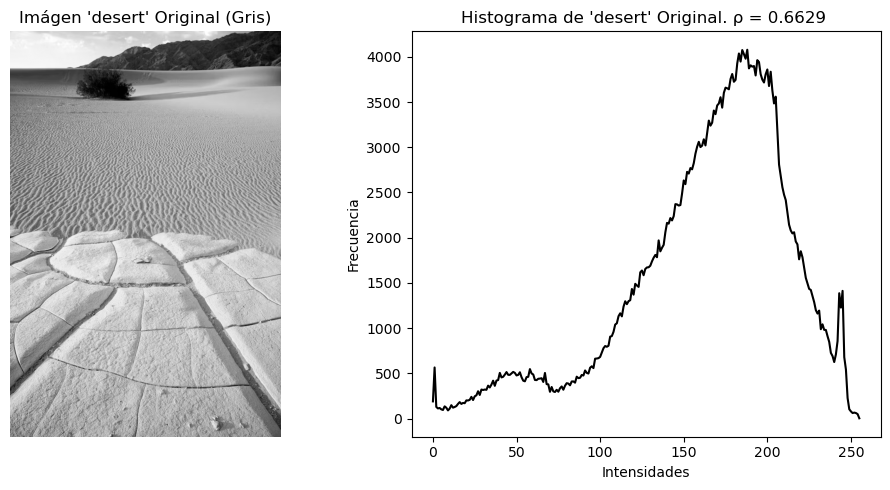

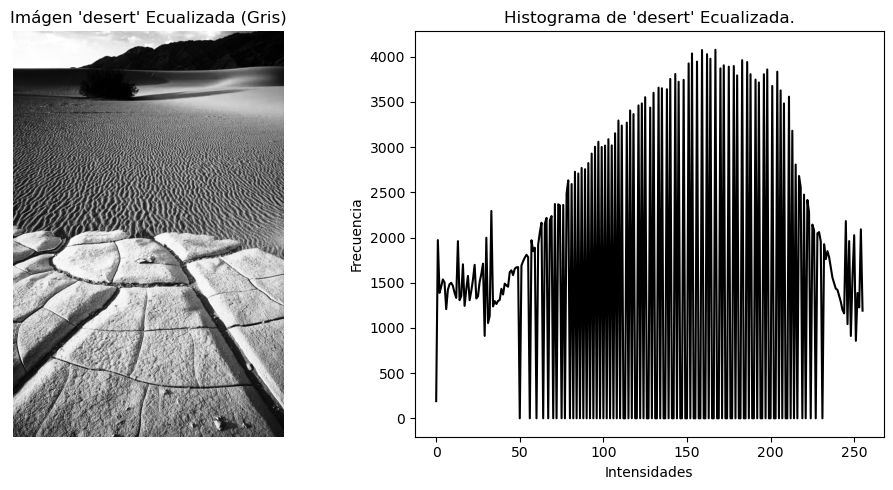


MENU PRINCIPAL

Ingrese el valor numérico de acuerdo a la siguinte lista:
1 = Iceland
2 = Owl
3 = PRS
4 = Dream Theater
5 = Desierto
0 = Salir del programa

Gracias por participar. :-)


In [42]:
### Se solicita el ingreso de que imágen se evaluará si se ecualiza o no
### Si se ingresa algún caracter que no sea un número entero se indicara y se solicitará que ingrese nuevamente un número

# Declaración e inicialización de variables.
archivo = ("Ice", "owl", "PRS", "DT1","desert")  # nombre de imagenes
folder_name = "Img_Ecualizada"          # carpeta a guardar imagenes nuevas

num1 = 0
j = True

# Mensaje de bienvenida:
print("Bienvenido \nIndique que imagen quiere ecualizar.")
print("No se admiten letras ni carácteres especiales como espacios ni símbolos \n")

# Loop para ingreso de valores
while j:

    # Manejo de excepciones para permitir solo números enteros.
    try:
        # Ingreso de valores
        print("\nMENU PRINCIPAL")
        print("\nIngrese el valor numérico de acuerdo a la siguinte lista:")
        print("1 = Iceland\n2 = Owl\n3 = PRS\n4 = Dream Theater\n5 = Desierto\n0 = Salir del programa")
        num1 = int(input("Ingresar el número de imágen: "))
        # Mostrar que se eligió
        if num1 > 0:
            print(f"\nSeleccionó la imagen No.{num1}")
        # Salir
        if num1 == 0:
            break
        # Si el valor ingresado es válido
        if 0 < num1 < 6:
            # Ruta de archivo
            name = f"{archivo[num1-1]}.jpg"
            # Lectura de imagen (convertida a escala de grises)
            img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    
            # Función para evaluar si se ecualiza (condición > 0.5)
            img_hist, condicion, densidad = comprobar_ecualizar(img)
            
            # Cumple la condición > 0.5 / llama la función img_ecualizar
            if condicion > 0.5:
                # Función para ecualizar
                img_ecu, hist_ecu = img_ecualizar(img, densidad)
                
                # Asegura que se guarden la imagen ecualizada e histograma y se grafiquen
                graficar_img = True

            else:
                # no se guardan las imagenes ecualizadas ni se grafican
                graficar_img = False
            
            ### Mostrar Gráficas ###
            plt.figure(figsize=(10,5))
            plt.subplot(1,2,1)
            plt.title(f"Imágen '{archivo[num1-1]}' Original (Gris)")
            plt.imshow(img, cmap='gray')
            plt.axis('off')

            plt.subplot(1,2,2)
            plt.title(f"Histograma de '{archivo[num1-1]}' Original. ρ = {condicion:.4f} ")
            plt.plot(img_hist, color = "black")
            plt.xlabel("Intensidades")
            plt.ylabel("Frecuencia")
            plt.tight_layout()

            if graficar_img:
                plt.figure(figsize=(10,5))  
                plt.subplot(1,2,1)
                plt.title(f"Imágen '{archivo[num1-1]}' Ecualizada (Gris)")
                plt.imshow(img_ecu, cmap='gray')
                plt.axis('off')

                plt.subplot(1,2,2)
                plt.title(f"Histograma de '{archivo[num1-1]}' Ecualizada.")
                plt.plot(hist_ecu, color = "black")
                plt.xlabel("Intensidades")
                plt.ylabel("Frecuencia")
                plt.tight_layout()
            
            plt.show()
            
            ### Guardar Imágenes en un diccionario. / Si no se ecualiza, no se agregan.
            diccionario_imagenes = {f"{archivo[num1-1]}_gris" :img}
            if graficar_img:
                diccionario_imagenes[f"{archivo[num1-1]}_ecu"] = img_ecu
                
            # Si no existe se crea la carpeta
            if not os.path.exists(folder_name):
                os.mkdir(folder_name)
            
            # Guardar las imágenes
            for nombre, imagen in diccionario_imagenes.items():
                ruta = f"{folder_name}/{nombre}.jpg"
                cv2.imwrite(ruta,imagen)
            
            # Guardar Histogramas
            plt.figure()
            plt.title(f"Histograma de '{archivo[num1-1]}' Original. ρ = {condicion:.4f} ")
            plt.plot(img_hist, color = "black")
            plt.xlabel("Intensidades")
            plt.ylabel("Frecuencia")
            plt.tight_layout()
            plt.savefig(f"{folder_name}/{archivo[num1-1]}_hist")
            plt.close()

            if graficar_img:
                plt.figure()
                plt.title(f"Histograma de '{archivo[num1-1]}' ecualizado.")
                plt.plot(hist_ecu, color = "black")
                plt.xlabel("Intensidades")
                plt.ylabel("Frecuencia")
                plt.tight_layout()
                plt.savefig(f"{folder_name}/{archivo[num1-1]}_hist_ecu")
                plt.close()
 
        # Si no está en la lista se solicita que se ingrese de nuevo
        else:
            print(f"\nEl número {num1} ingresado no es valor válido.\n ")
    
    # excepción al ingreso de caracteres diferentea a un número
    except ValueError:
        print("\nIngresó un caracter no aceptado. Solo se adminten números 'enteros' para esta operación")
        print("Intente de nuevo.\n")

print("\nGracias por participar. :-)")